# Profile ``qtcurrent``

This notebook will profile the ``qtcurrent`` module in QMix. This module calculates the quasiparticle tunneling currents through the SIS junction. In many ways, this is the core module in QMix.

In [1]:
%load_ext memory_profiler
%load_ext line_profiler
%matplotlib inline

import qmix
from qmix.qtcurrent import qtcurrent, interpolate_respfn, _current_4_tones, _current_coeff_4_tones

import cProfile, pstats, io
from pstats import SortKey

from IPython.display import Image

In [2]:
# Setup
resp = qmix.respfn.RespFnPolynomial(50, verbose=False)
num_b = 15

# 1 Tone

In [3]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(1, 1)
cct.freq[1] = 0.3

vj = cct.initialize_vj()
vj[1,1,:] = 0.3

resp_interp = interpolate_respfn(cct, resp, num_b)

In [4]:
profiler = cProfile.Profile()
profiler.enable()

# Code to profile
# idc = qtcurrent(vj, cct, resp, 0.,  num_b=num_b, verbose=False, resp_matrix=resp_interp)
iac = qtcurrent(vj, cct, resp, 0.3, num_b=num_b, verbose=False, resp_matrix=resp_interp)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())

profiler.dump_stats('results/profiler-qtcurrent-1tone.prof')

In [5]:
%%bash
gprof2dot -f pstats results/profiler-qtcurrent-1tone.prof | dot -Tpng -o results/prof-qtcurrent-1tone.png

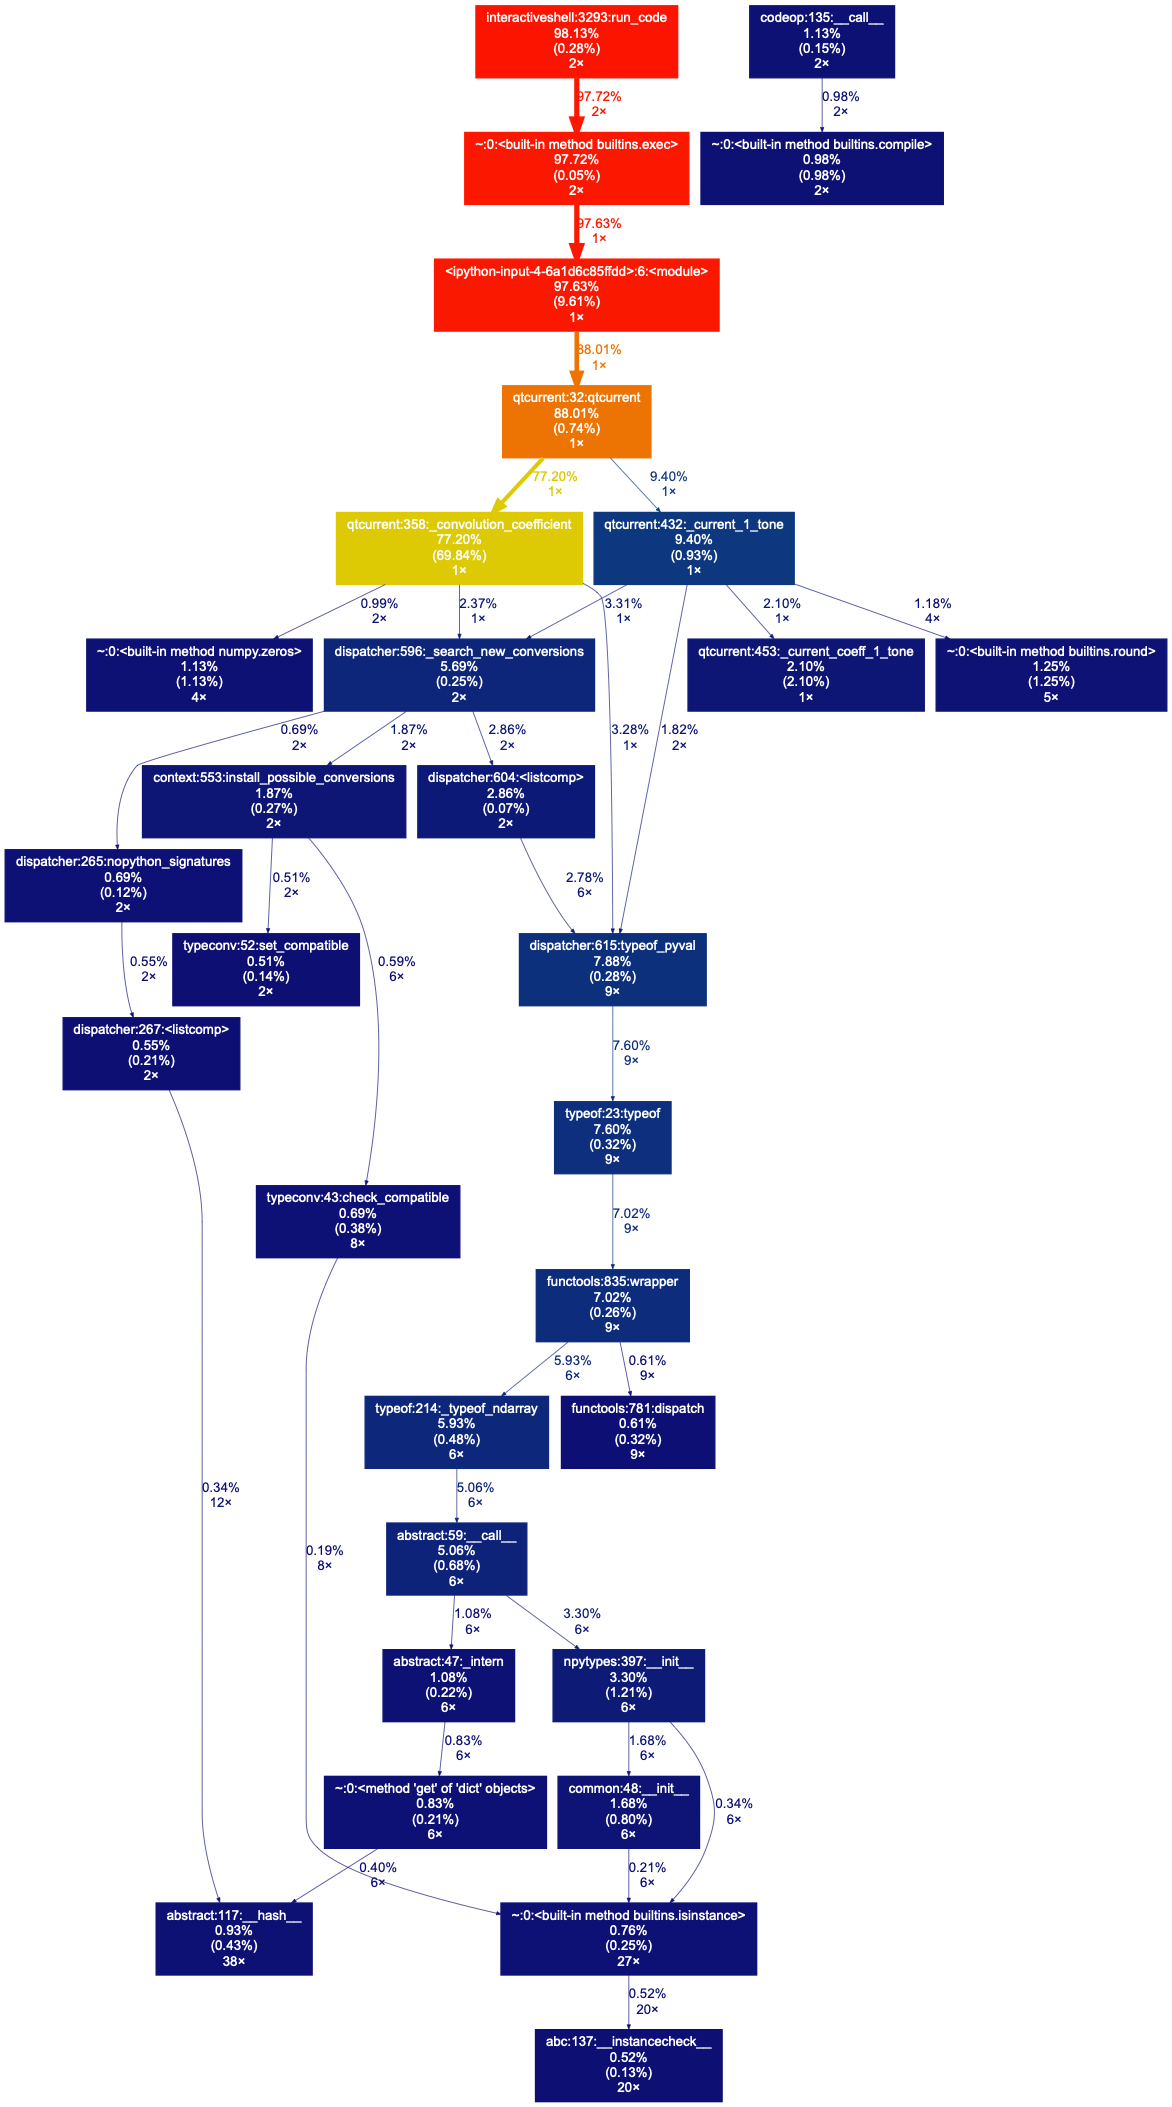

In [6]:
Image(filename='results/prof-qtcurrent-1tone.png') 

# 2 Tones

In [7]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(2, 1)
cct.freq[1] = 0.30
cct.freq[2] = 0.33

vj = cct.initialize_vj()
vj[1,1,:] = 0.3
vj[2,1,:] = 0.1

resp_interp = interpolate_respfn(cct, resp, num_b)

In [8]:
profiler = cProfile.Profile()
profiler.enable()

# Code to profile
# idc = qtcurrent(vj, cct, resp, 0.,  num_b=num_b, verbose=False, resp_matrix=resp_interp)
iac = qtcurrent(vj, cct, resp, 0.3, num_b=num_b, verbose=False, resp_matrix=resp_interp)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())

profiler.dump_stats('results/profiler-qtcurrent-2tone.prof')

In [9]:
%%bash
gprof2dot -f pstats results/profiler-qtcurrent-2tone.prof | dot -Tpng -o results/prof-qtcurrent-2tone.png

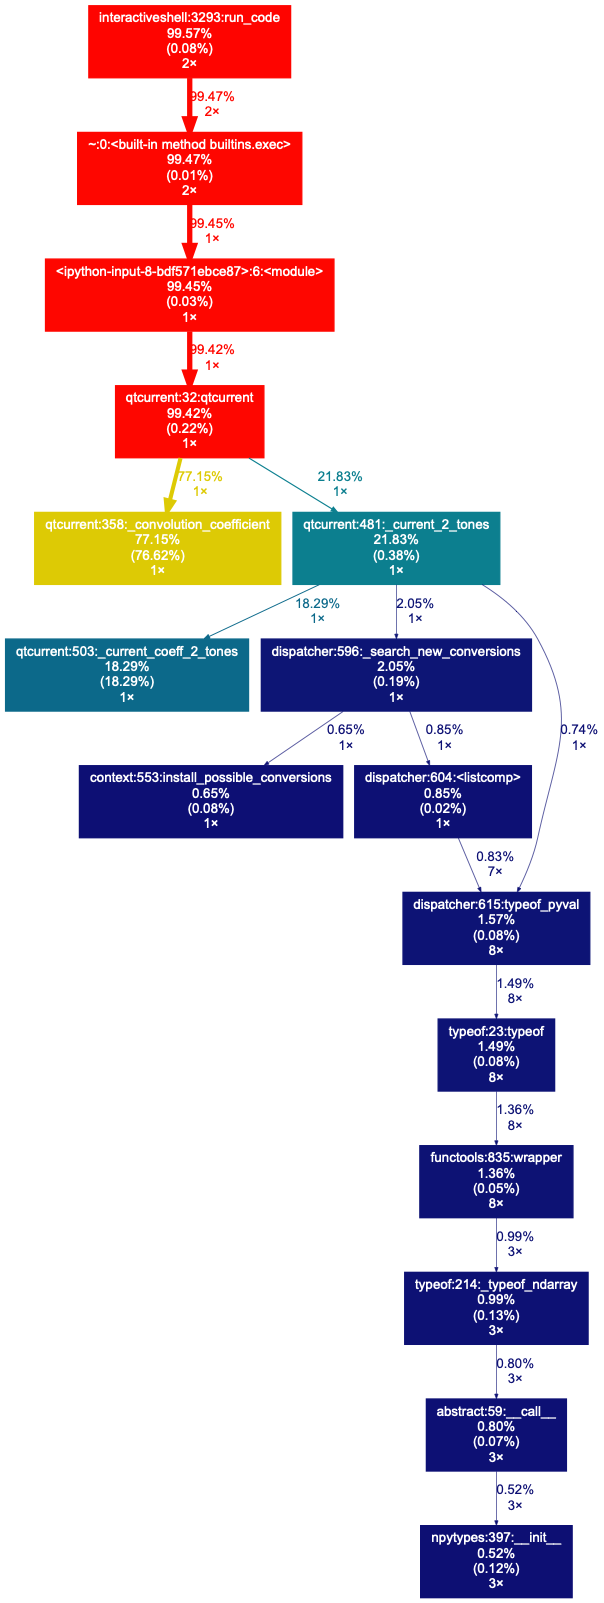

In [10]:
Image(filename='results/prof-qtcurrent-2tone.png') 

# 3 Tones

In [11]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(3, 1)
cct.freq[1] = 0.30
cct.freq[2] = 0.33
cct.freq[3] = 0.27

vj = cct.initialize_vj()
vj[1,1,:] = 0.3
vj[2,1,:] = 0.1
vj[3,1,:] = 0.1

resp_interp = interpolate_respfn(cct, resp, num_b)

In [12]:
profiler = cProfile.Profile()
profiler.enable()

# Code to profile
# idc = qtcurrent(vj, cct, resp, 0.,  num_b=num_b, verbose=False, resp_matrix=resp_interp)
iac = qtcurrent(vj, cct, resp, 0.3, num_b=num_b, verbose=False, resp_matrix=resp_interp)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())

profiler.dump_stats('results/profiler-qtcurrent-3tone.prof')

In [13]:
%%bash
gprof2dot -f pstats results/profiler-qtcurrent-3tone.prof | dot -Tpng -o results/prof-qtcurrent-3tone.png

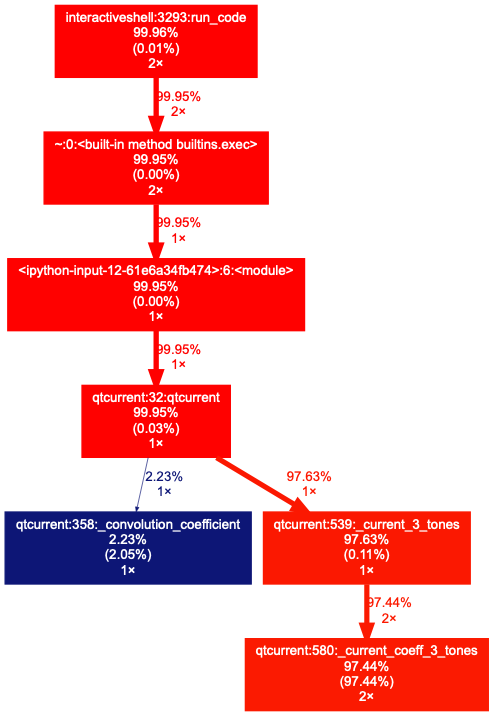

In [14]:
Image(filename='results/prof-qtcurrent-3tone.png') 

# 4 Tones

In [3]:
# Setup
cct = qmix.circuit.EmbeddingCircuit(4, 1)
cct.freq[1] = 0.30
cct.freq[2] = 0.33
cct.freq[3] = 0.27
cct.freq[4] = 0.03

vj = cct.initialize_vj()
vj[1,1,:] = 0.3
vj[2,1,:] = 0.1
vj[3,1,:] = 0.1
vj[4,1,:] = 0.0

resp_interp = interpolate_respfn(cct, resp, num_b)

In [16]:
profiler = cProfile.Profile()
profiler.enable()

# Code to profile
# idc = qtcurrent(vj, cct, resp, 0.,  num_b=num_b, verbose=False, resp_matrix=resp_interp)
iac = qtcurrent(vj, cct, resp, 0.3, num_b=num_b, verbose=False, resp_matrix=resp_interp)

profiler.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(profiler, stream=s).sort_stats(sortby)
ps.print_stats()
# print(s.getvalue())

profiler.dump_stats('results/profiler-qtcurrent-4tone.prof')

In [17]:
%%bash
gprof2dot -f pstats results/profiler-qtcurrent-4tone.prof | dot -Tpng -o results/prof-qtcurrent-4tone.png

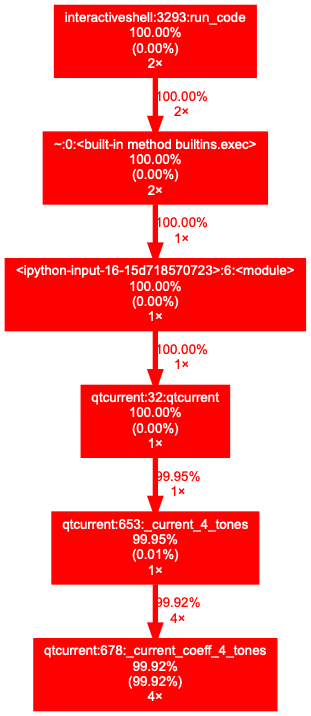

In [18]:
Image(filename='results/prof-qtcurrent-4tone.png') 

### Line-by-line

**Note:** You have to remove the ``@jit`` on ``_current_coeff_4_tones``

In [4]:
%lprun -f _current_coeff_4_tones qtcurrent(vj, cct, resp, 0.3, num_b=num_b, verbose=False, resp_matrix=resp_interp)

### Memory usage

In [5]:
%memit qtcurrent(vj, cct, resp, 0.3, num_b=num_b, verbose=False, resp_matrix=resp_interp)

peak memory: 2992.12 MiB, increment: 1.81 MiB
